In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r'..\data\HR_capstone_dataset.csv')

## Data Exploration

Como eu não conheço o dataset, vou fazer uma exploração inicial para entender melhor os dados.
Passos:

1. Carregar o dataset.
2. Verificar as primeiras linhas.
3. Verificar o tipo de dados de cada coluna (Para um possível modelo de previsão, é importante que as colunas de interesse estejam no formato numérico).
4. Verificar se há valores ausentes, dependendo do modelo de previsão, pode ser necessário lidar com esses valores.
5. Verificar distribuições, outliers e correlações entre as variáveis.

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

### Primeiras impressões

1. Aparentemente minha variável alvo será a coluna `left` que significa se o funcionário deixou a empresa ou não.
## Descrição das Variáveis

### Variáveis Numéricas
- **satisfaction_level**: Nível de satisfação do funcionário
- **last_evaluation**: Última avaliação de desempenho
- **number_project**: Número de projetos atribuídos
- **average_montly_hours**: Média de horas mensais trabalhadas
- **time_spend_company**: Tempo na empresa (anos)

### Variáveis Binárias
- **Work_accident**: Se teve acidente de trabalho (0/1)
- **left**: Se deixou a empresa (variável alvo)
- **promotion_last_5years**: Se teve promoção nos últimos 5 anos (0/1)

### Variáveis Categóricas
- **Department**: Departamento do funcionário
- **salary**: Nível salarial (low, medium, high)

In [5]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

Como a maioria das colunas estão no formato numérico, as únicas que precisarei lidar serão as colunas `Department` e `salary`, que são categóricas. Mas isso será feito mais adiante, quando eu for preparar os dados para o modelo de previsão.

In [6]:
data.shape
# Como cada linha representa um funcionário, há 14999 respostas nessa pesquisa.

(14999, 10)

In [7]:
#Ferramentas para visualização
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='salary', ylabel='satisfaction_level'>

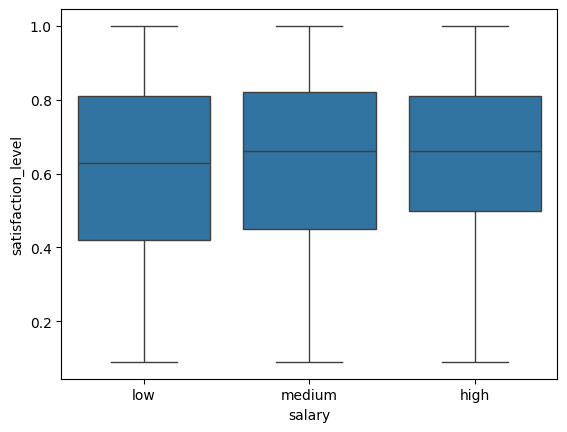

In [8]:
sns.boxplot(x='salary', y='satisfaction_level', data=data)

A primeira vista, a satisfação não parece ser muito afetada pelo nível de salário. Suas médias estão próximas.

<Axes: xlabel='left', ylabel='satisfaction_level'>

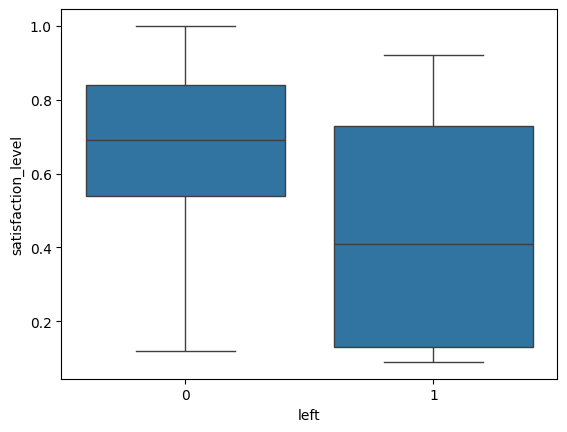

In [9]:
sns.boxplot(x='left', y='satisfaction_level', data=data)

É bem aparente que o nível de satisfação é diferente entre as pessoas que saíram da empresa e as que não saíram. A média de satisfação das pessoas que saíram é bem menor do que a das que ficaram.
O que talvez já fosse de se esperar, mas é interessante ver isso nos dados.

In [10]:
sns.set_theme(style="whitegrid")

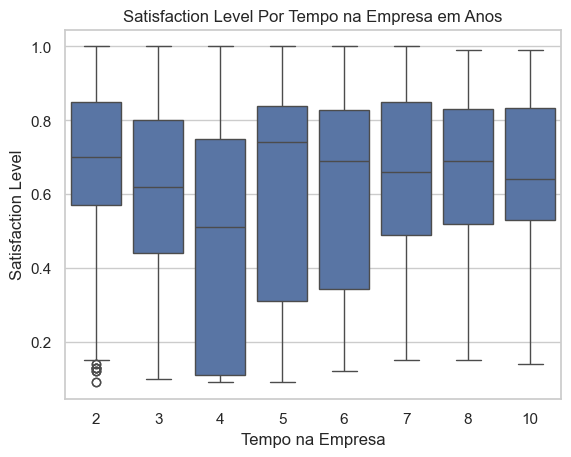

In [11]:
sns.boxplot(x='time_spend_company', y='satisfaction_level', data=data)
plt.title('Satisfaction Level Por Tempo na Empresa em Anos')
plt.xlabel('Tempo na Empresa')
plt.ylabel('Satisfaction Level')
plt.show()

Vamos dar uma olhada mais aprofundada nesses funcionários que estão há 4 anos na empresa. E tentar entender melhor o que pode ter levado eles a ter uma impressão pior da empresa.

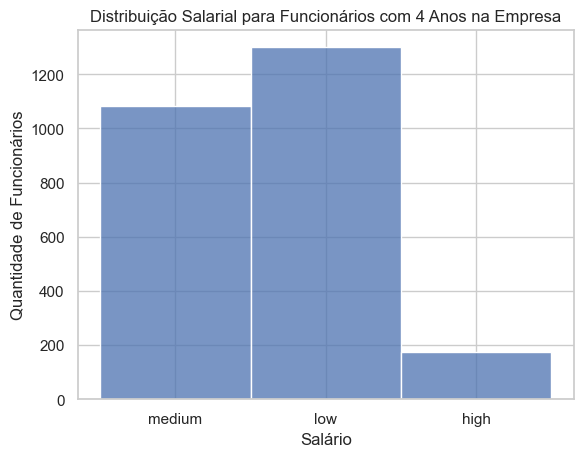

In [12]:
sns.histplot(data=data[data['time_spend_company'] == 4], x='salary', stat='count')
plt.title('Distribuição Salarial para Funcionários com 4 Anos na Empresa')
plt.xlabel('Salário')
plt.ylabel('Quantidade de Funcionários')
plt.show()

Pode se perceber que os funcionários que estão há 4 anos na empresa possuem ou possuíam salários baixos ou médios. Isso pode ser um indicativo de que esses funcionários não estão satisfeitos com o salário e isso pode ter influenciado na sua decisão de sair da empresa.

In [13]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Dado a diferença na satisfação dos funcionários com 4 anos de empresa, quero comparar algumas variáveis entre os funcionários que têm 4 anos de empresa e os demais.

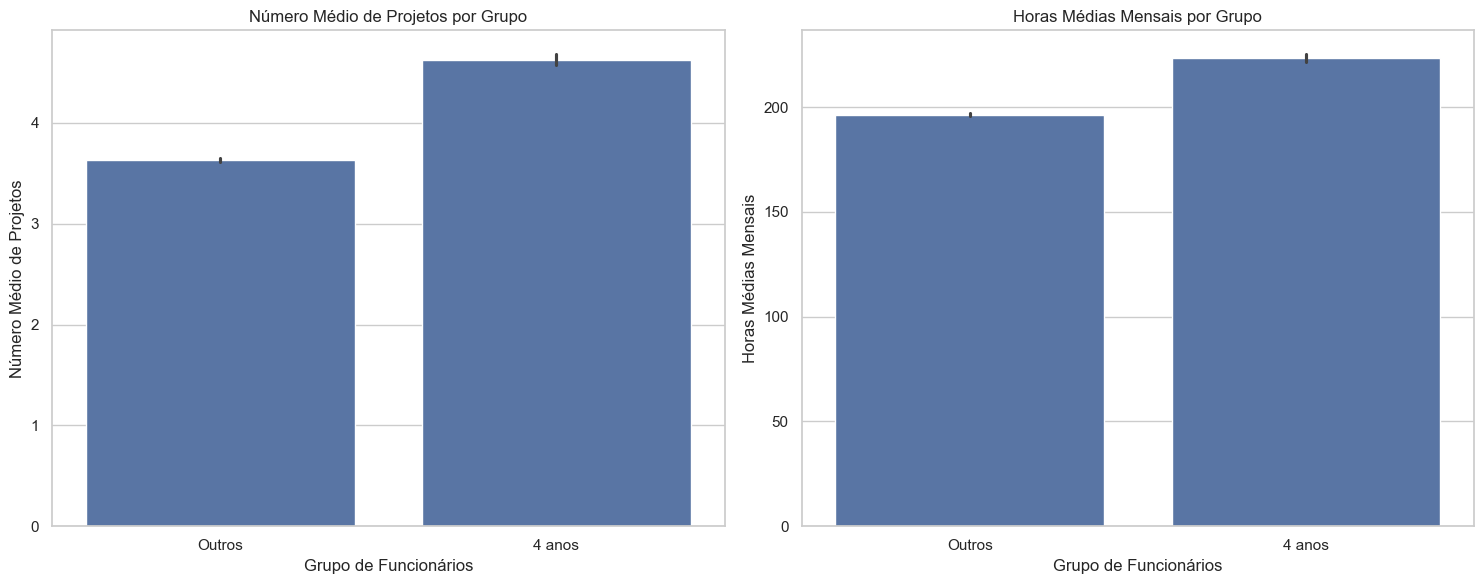

In [14]:
# Criar uma nova coluna para categorizar os funcionários
data['group_4_years'] = data['time_spend_company'].apply(lambda x: '4 anos' if x == 4 else 'Outros')

# Criar subplots para comparar as duas métricas
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Número médio de projetos
sns.barplot(data=data, x='group_4_years', y='number_project', ax=axes[0])
axes[0].set_title('Número Médio de Projetos por Grupo')
axes[0].set_xlabel('Grupo de Funcionários')
axes[0].set_ylabel('Número Médio de Projetos')

# Gráfico 2: Horas médias trabalhadas
sns.barplot(data=data, x='group_4_years', y='average_montly_hours', ax=axes[1])
axes[1].set_title('Horas Médias Mensais por Grupo')
axes[1].set_xlabel('Grupo de Funcionários')
axes[1].set_ylabel('Horas Médias Mensais')

plt.tight_layout()
plt.show()

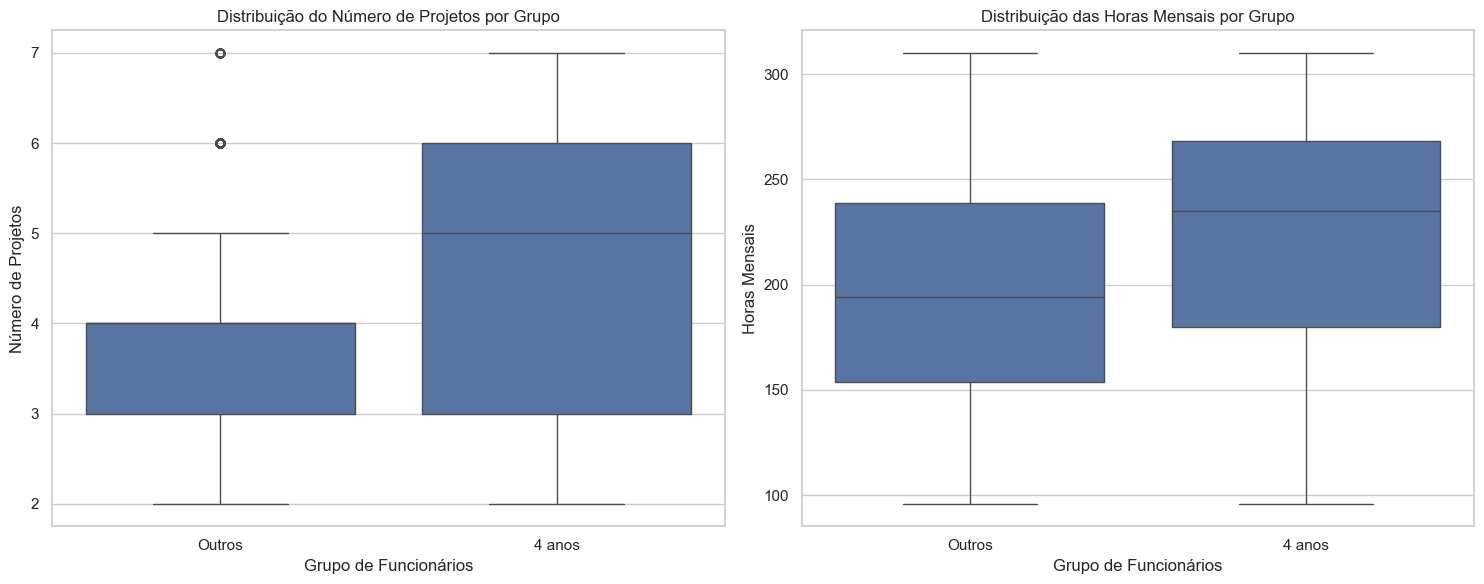

In [15]:
# Boxplots para ver a distribuição completa, não apenas as médias
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot 1: Número de projetos
sns.boxplot(data=data, x='group_4_years', y='number_project', ax=axes[0])
axes[0].set_title('Distribuição do Número de Projetos por Grupo')
axes[0].set_xlabel('Grupo de Funcionários')
axes[0].set_ylabel('Número de Projetos')

# Boxplot 2: Horas trabalhadas
sns.boxplot(data=data, x='group_4_years', y='average_montly_hours', ax=axes[1])
axes[1].set_title('Distribuição das Horas Mensais por Grupo')
axes[1].set_xlabel('Grupo de Funcionários')
axes[1].set_ylabel('Horas Mensais')

plt.tight_layout()
plt.show()

💡 A partir destes dois gráficos é possível afirmar que os funcionários que estão há 4 anos na empresa possuem uma média de horas mensais trabalhadas maior do que os demais funcionários. Isso pode ser um indicativo de que esses funcionários estão trabalhando mais horas do que os demais e isso pode ter influenciado na sua decisão de sair da empresa, por acharem injusto trabalhar mais horas e receber o mesmo salário ou até menor do que os demais funcionários. 

Vamos investigar se há uma relação entre esses funcionários e a quantidade de pessoas que saem da empresa.

Taxa de Rotatividade por Grupo:
Funcionários com 4 anos: 34.8%
Outros funcionários: 21.5%


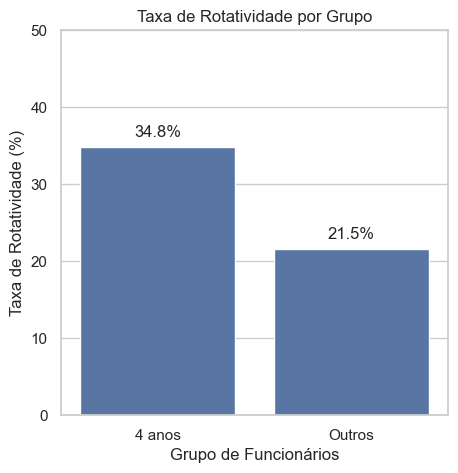

In [16]:
# Calcular a taxa de rotatividade para cada grupo
rotation_rate = data.groupby('group_4_years')['left'].agg(['count', 'sum']).reset_index()
rotation_rate['retention_rate'] = (rotation_rate['count'] - rotation_rate['sum']) / rotation_rate['count'] * 100
rotation_rate['turnover_rate'] = rotation_rate['sum'] / rotation_rate['count'] * 100

print("Taxa de Rotatividade por Grupo:")
print(f"Funcionários com 4 anos: {rotation_rate[rotation_rate['group_4_years'] == '4 anos']['turnover_rate'].iloc[0]:.1f}%")
print(f"Outros funcionários: {rotation_rate[rotation_rate['group_4_years'] == 'Outros']['turnover_rate'].iloc[0]:.1f}%")

# Visualizar
plt.figure(figsize=(5, 5))
sns.barplot(data=rotation_rate, x='group_4_years', y='turnover_rate')
plt.title('Taxa de Rotatividade por Grupo')
plt.ylabel('Taxa de Rotatividade (%)')
plt.xlabel('Grupo de Funcionários')
plt.ylim(0, 50)

# Adicionar valores nas barras
for i, v in enumerate(rotation_rate['turnover_rate']):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

plt.show()

⚠️ Pra finalizar a conclusão, podemos afirmar que funcionários que estão a 4 anos na empresa, tem uma taxa de saída maior do que os demais funcionários. E o motivo não é apenas o tempo de empresa mas o fato de que estes colaboradores estarem trabalhando mais e seus salários não são proporcionais a isso, principalmente se eles se compararem aos outros.

In [17]:
data.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,group_4_years
0,0.38,0.53,2,157,3,0,1,0,sales,low,Outros
1,0.80,0.86,5,262,6,0,1,0,sales,medium,Outros


In [18]:
data['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

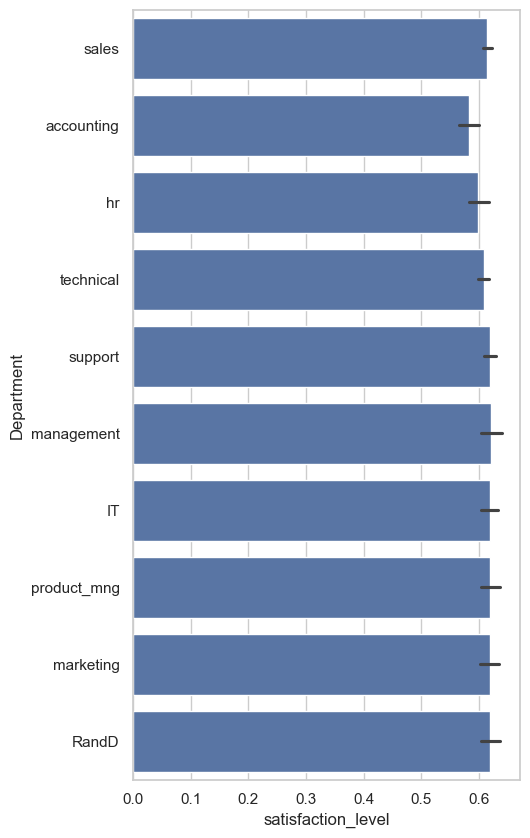

In [19]:
plt.figure(figsize=(5, 10))
sns.barplot(data=data, y='Department', x='satisfaction_level')
plt.show()

Aqui pode-se ver que o nível de satisfação entre os diferentes setores da empresa é bem similar. O departamento "Accounting" tem uma satisfação geral menor, porém não talvez suficientemente para decretar que há um problema.
Porém, vamos verificar especificamente para os funcionários que estão há 4 anos na empresa, para ver se há alguma diferença significativa entre os setores.

In [20]:
data['satisfaction_level'].describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

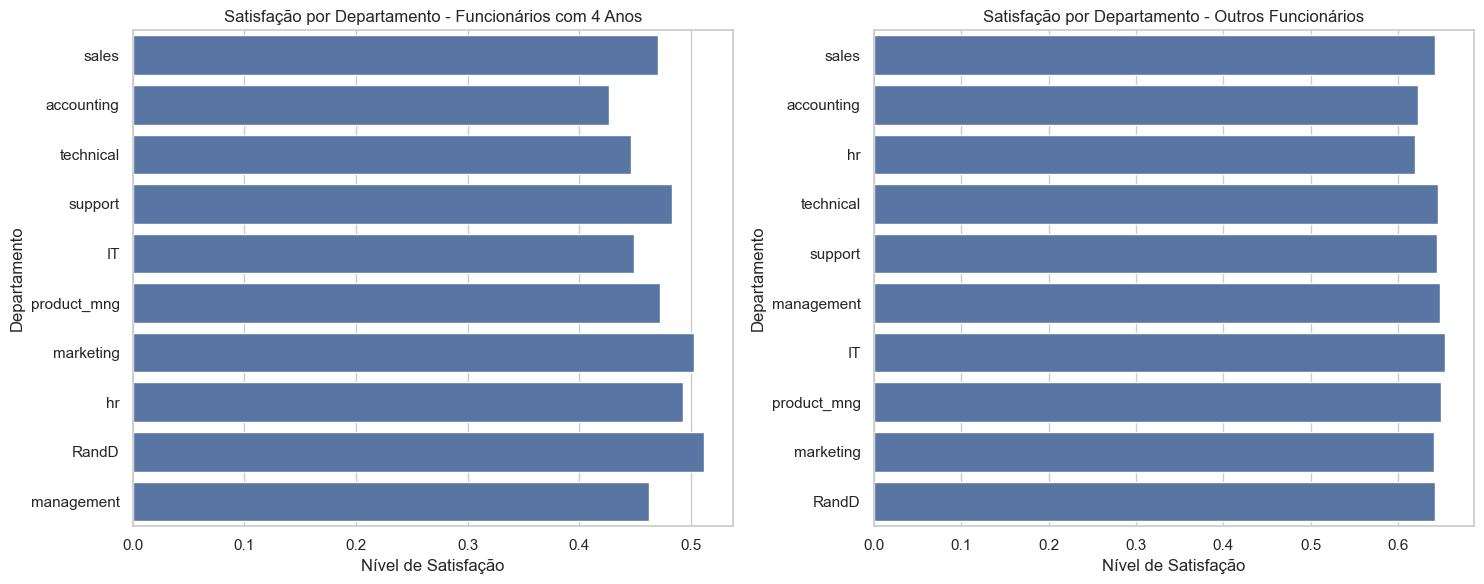

In [21]:
# Comparar satisfação entre funcionários com 4 anos vs outros
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Funcionários com 4 anos de empresa
sns.barplot(data=data[data['time_spend_company']==4], y='Department', x='satisfaction_level', errorbar=None, ax=axes[0])
axes[0].set_title('Satisfação por Departamento - Funcionários com 4 Anos')
axes[0].set_xlabel('Nível de Satisfação')
axes[0].set_ylabel('Departamento')

# Gráfico 2: Outros funcionários (não 4 anos)
sns.barplot(data=data[data['time_spend_company']!=4], y='Department', x='satisfaction_level', ax=axes[1], errorbar=None)
axes[1].set_title('Satisfação por Departamento - Outros Funcionários')
axes[1].set_xlabel('Nível de Satisfação')
axes[1].set_ylabel('Departamento')

plt.tight_layout()
plt.show()

Aqui, apesar de o nível de satisfação entre os funcionários que estão há 4 anos na empresa dentre os setores ser similar, podemos ver que está abaixo de `0.5` em praticamente todos os setores. Então pode-se afirmar que os funcionários que estão há 4 anos na empresa estão insatisfeitos com a empresa, independente do setor.

Porém de forma geral, um nível de satisfação abaixo de `0.8` já é um indicativo de que o funcionário não está satisfeito com a empresa. Então, mesmo que o nível de satisfação esteja acima de `0.5`, ainda assim é um indicativo de que os funcionários estão insatisfeitos com a empresa.

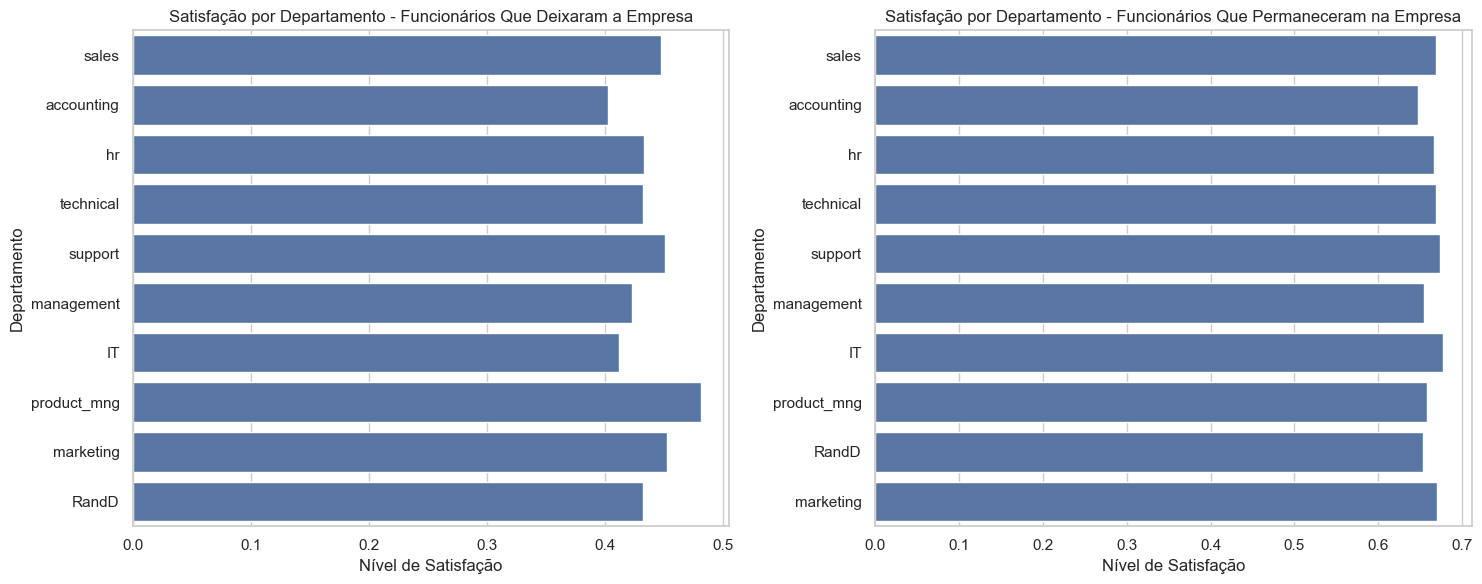

In [22]:
# Comparar satisfação entre funcionários com 4 anos vs outros
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Funcionários com 4 anos de empresa
sns.barplot(data=data[data['left']==1], y='Department', x='satisfaction_level', errorbar=None, ax=axes[0])
axes[0].set_title('Satisfação por Departamento - Funcionários Que Deixaram a Empresa')
axes[0].set_xlabel('Nível de Satisfação')
axes[0].set_ylabel('Departamento')

# Gráfico 2: Outros funcionários (não 4 anos)
sns.barplot(data=data[data['left']!=1], y='Department', x='satisfaction_level', ax=axes[1], errorbar=None)
axes[1].set_title('Satisfação por Departamento - Funcionários Que Permaneceram na Empresa')
axes[1].set_xlabel('Nível de Satisfação')
axes[1].set_ylabel('Departamento')

plt.tight_layout()
plt.show()

In [23]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,group_4_years
0,0.38,0.53,2,157,3,0,1,0,sales,low,Outros
1,0.80,0.86,5,262,6,0,1,0,sales,medium,Outros
2,0.11,0.88,7,272,4,0,1,0,sales,medium,4 anos
3,0.72,0.87,5,223,5,0,1,0,sales,low,Outros
4,0.37,0.52,2,159,3,0,1,0,sales,low,Outros


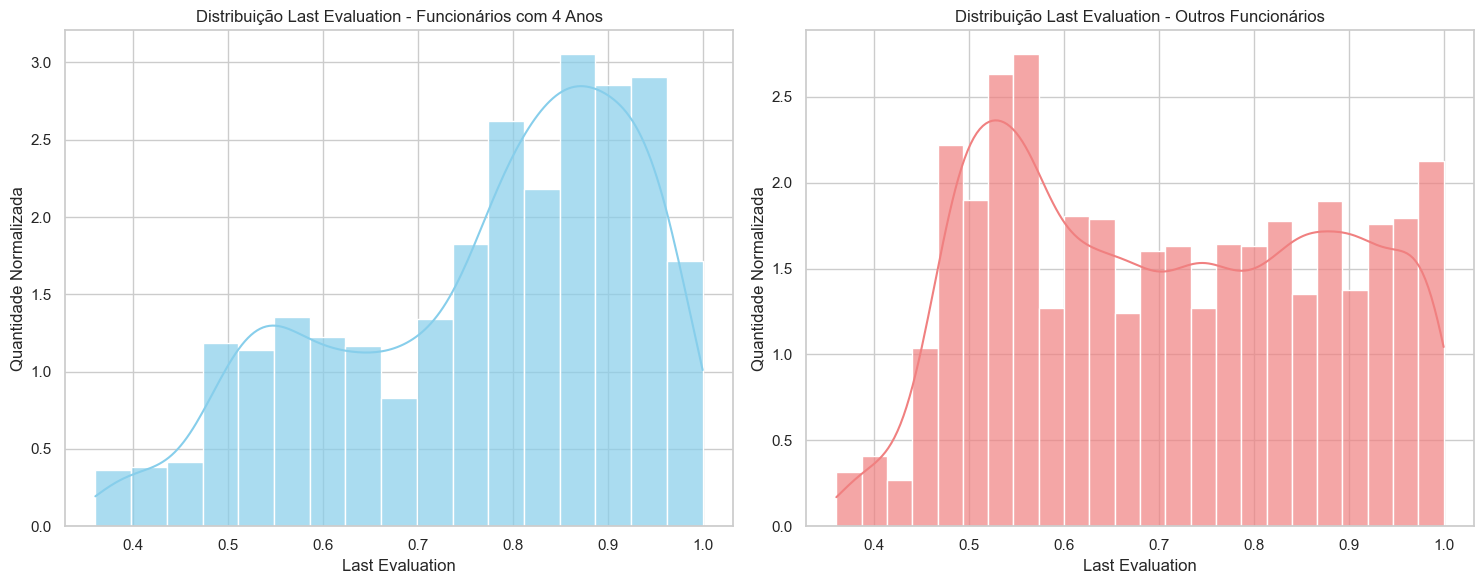

In [27]:
# Comparar last_evaluation entre os grupos com densidade normalizada
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Funcionários com 4 anos
sns.histplot(data=data[data['time_spend_company']==4], x='last_evaluation', 
             stat='density', ax=axes[0], color='skyblue', alpha=0.7, kde=True)
axes[0].set_title('Distribuição Last Evaluation - Funcionários com 4 Anos')
axes[0].set_xlabel('Last Evaluation')
axes[0].set_ylabel('Quantidade Normalizada')

# Gráfico 2: Outros funcionários
sns.histplot(data=data[data['time_spend_company']!=4], x='last_evaluation', 
             stat='density', ax=axes[1], color='lightcoral', alpha=0.7, kde=True)
axes[1].set_title('Distribuição Last Evaluation - Outros Funcionários')
axes[1].set_xlabel('Last Evaluation')
axes[1].set_ylabel('Quantidade Normalizada')

plt.tight_layout()
plt.show()